In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv


**1.Projede kullanacağımız Python kütüphanelerini içe aktarıyoruz.** 

numpy ve pandas, veri işleme ve analiz için; matplotlib ve seaborn, veri görselleştirme için; sklearn, makine öğrenmesi modelleme ve değerlendirme için kullanılır. Ayrıca, metin verilerini sayısal formata dönüştürmek için TfidfVectorizer, ve gözetimsiz öğrenme için KMeans gibi algoritmalar da içe aktarılmaktadır.

In [4]:
# Gerekli kütüphaneler
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



**2.Veri setini pandas kullanarak okuyup analiz ediyoruz.** 

İlk olarak veri setinin ilk birkaç satırını görüntüleyerek veri yapısını ve içerdiği bilgileri anlamaya çalışıyoruz. Ayrıca, veri setinin bilgi özetini ve sınıf dağılımını kontrol ederek veri setinin özelliklerini ve dengesini değerlendiriyoruz.

In [5]:
# Veri setinin yüklenmesi
df = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

# Veri setinin ilk birkaç satırını görüntüleme
print(df.head())

# Veri setinin bilgi özetini görüntüleme
print(df.info())

# Sentiment kolonundaki değerlerin dağılımını gösterme
print(df['sentiment'].value_counts())

# Metin verilerini sayısal formata dönüştürme
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])



                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


**3. Keşifsel Veri Analizi (EDA)**

Veri setindeki sınıf dağılımını görselleştirmek için seaborn kullanıyoruz. Bu, veri setindeki olumlu ve olumsuz incelemelerin sayısını gösteren bir grafik ile veri setinin dengesini daha iyi anlamamıza yardımcı olur.

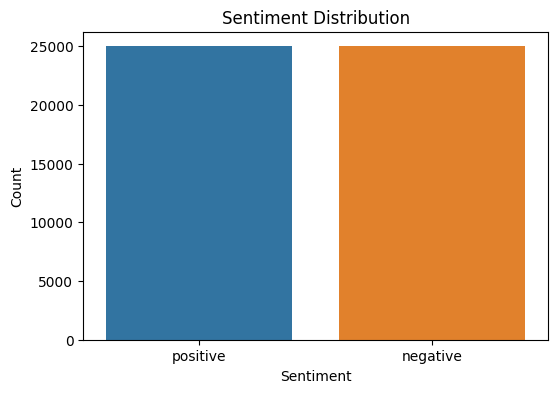

In [7]:
# Veri görselleştirme
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


**4. Metin Verilerini Sayısal Formata Dönüştürme**

Metin verilerini makine öğrenmesi modelleri için uygun bir sayısal formata dönüştürüyoruz. Bunun için TfidfVectorizer kullanarak her incelemenin önemli kelimelerini ve bunların frekanslarını içeren bir özellik matrisi oluşturuyoruz. Ayrıca, hedef değişkeni olan sentiment sütununu sayısal değerlere dönüştürüyoruz.

In [12]:
# Metin verilerini sayısal formata dönüştürme
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['review'])

# Hedef değişkeni sayısal formata dönüştürme
y = df['sentiment'].map({'positive': 1, 'negative': 0})


**5. Eğitim ve Test Setlerine Ayırma**

Veri setini eğitim ve test setlerine ayırıyoruz. Eğitim seti modeli eğitmek için, test seti ise modelin genel performansını değerlendirmek için kullanılacak. train_test_split fonksiyonu bu ayrımı rastgele yaparak modelin genelleme yeteneğini test etmemize olanak tanır.

In [14]:
# Eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**6. Lojistik Regresyon Modeli** (Supervised Learning)

Lojistik regresyon modelini oluşturup eğitim verisi ile eğitiyoruz. Modeli test verisi üzerinde tahminler yapmak için kullanıyoruz ve ardından modelin doğruluğunu değerlendirmek üzere çeşitli metrikler (karışıklık matrisi ve sınıflandırma raporu gibi) hesaplıyoruz.

In [15]:
# Lojistik Regresyon Modeli
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_logistic = logistic_model.predict(X_test)

# Model performansını değerlendirme
print("Lojistik Regresyon Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_logistic))

print("\nLojistik Regresyon Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Lojistik Regresyon Confusion Matrix:
[[4353  608]
 [ 451 4588]]

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



**7. Naive Bayes Modeli** (Supervised Learning)

Naive Bayes modelini oluşturuyoruz, eğitiyoruz ve performansını değerlendiriyoruz. MultinomialNB modelini kullanarak metin verilerini sınıflandırıyoruz.

In [16]:
# Naive Bayes modelini oluşturma
nb_model = MultinomialNB()

# Modeli eğitme
nb_model.fit(X_train, y_train)


MultinomialNB()

In [17]:
# Test seti üzerinde tahmin yapma
y_pred = nb_model.predict(X_test)

# Performans metriklerini hesaplama
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Naive Bayes Accuracy Score:")
print(accuracy)

print("Naive Bayes Confusion Matrix:")
print(conf_matrix)

print("\nNaive Bayes Classification Report:")
print(class_report)




Naive Bayes Accuracy Score:
0.8654
Naive Bayes Confusion Matrix:
[[4352  609]
 [ 737 4302]]

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      4961
           1       0.88      0.85      0.86      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



**8. KMeans Kümeleme**

Bu adımda, metin verilerini anlamak ve benzerliklerini keşfetmek için KMeans kümeleme algoritmasını kullanacağız. KMeans, verileri belirli sayıda kümeye ayırmak için kullanılan gözetimsiz öğrenme yöntemlerinden biridir.

***8.1. KMeans Modelini Oluşturma ve Eğitme***

Öncelikle, metin verilerini sayısal formata dönüştürdükten sonra KMeans modelini oluşturup eğitiyoruz. Modelin n_clusters parametresi, verilerin kaç kümeye ayrılacağını belirler.

In [18]:
# KMeans modelini oluşturma ve eğitme
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)


KMeans(n_clusters=2, n_init=10, random_state=42)

***8.2. Küme Etiketlerini ve Merkezlerini Alma***

KMeans algoritması uygulandıktan sonra, her bir veri noktasının ait olduğu küme etiketlerini ve küme merkezlerini alıyoruz.



In [20]:
# Küme etiketlerini al
labels = kmeans.labels_

# Küme merkezlerini alma
centroids = kmeans.cluster_centers_

# Küme etiketlerini veri çerçevesine ekleme
df['cluster'] = labels


*Burada, labels her bir incelemenin hangi kümeye ait olduğunu gösterirken, centroids kümelerin merkezlerini temsil eder. Bu bilgiyi veri çerçevesine cluster adıyla ekliyoruz.*



***8.3. Sonuçların Görselleştirilmesi***

Kümeleme sonuçlarını görselleştirerek verinin nasıl kümelendiğini inceleyebiliriz. Bu adımda, kümelerin dağılımını görselleştiriyoruz.

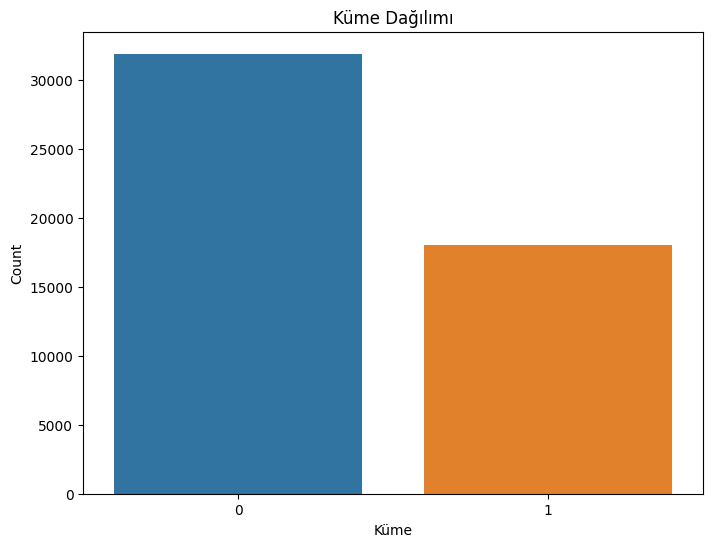

In [22]:
# Küme dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cluster')
plt.title('Küme Dağılımı')
plt.xlabel('Küme')
plt.ylabel('Count')
plt.show()


***8.4. Örnek İncelemeler***

Son olarak, kümeleme sonuçlarını daha iyi anlayabilmek için, bazı örnek incelemeleri ve bunların hangi kümeye ait olduklarını yazdırabiliriz.

In [23]:
# Örnek: İlk 10 incelemeyi ve hangi kümeye ait olduklarını yazdırma
print(df[['review', 'cluster']].head(10))


                                              review  cluster
0  One of the other reviewers has mentioned that ...        0
1  A wonderful little production. <br /><br />The...        1
2  I thought this was a wonderful way to spend ti...        1
3  Basically there's a family where a little boy ...        1
4  Petter Mattei's "Love in the Time of Money" is...        1
5  Probably my all-time favorite movie, a story o...        0
6  I sure would like to see a resurrection of a u...        0
7  This show was an amazing, fresh & innovative i...        0
8  Encouraged by the positive comments about this...        0
9  If you like original gut wrenching laughter yo...        1


**9. Lojistik Regresyon(SuperVised) ve KMeans Karşılaştırması (UnSupervised)**

***9.1. Lojistik Regresyon ve KMeans Arasındaki Farklar***

**Lojistik Regresyon:** Gözetimli öğrenme algoritmasıdır. Bu model, eğitim sırasında etiketlenmiş veri kullanır ve sınıflandırma problemlerinde kullanılır. Özellikle iki sınıflı (binary) sınıflandırma görevlerinde etkili bir yöntemdir. Bu projede, incelemelerin olumlu mu yoksa olumsuz mu olduğunu tahmin etmek için Lojistik Regresyon kullanıyoruz.

**KMeans:** Gözetimsiz öğrenme algoritmasıdır ve etiketlenmemiş veriyi kümelere ayırmak için kullanılır. KMeans, veri noktalarını belirli sayıda kümeye ayırarak gruplar oluşturur. Bu projede, KMeans kullanarak inceleme verilerini belirli özelliklere göre kümeliyoruz, böylece veri içerisindeki benzer incelemeleri keşfedebiliriz. KMeans, verideki gizli yapıları keşfetmek için kullanılır ve sınıflandırma performansıyla ölçülemez.


***9.2 Lojistik Regresyon Performansı***

Lojistik Regresyon modeli, etiketli verilerle eğitilmiş ve performansı doğruluk (accuracy), karışıklık matrisi (confusion matrix), ve sınıflandırma raporu (classification report) ile değerlendirilmiştir. Aşağıda modelin temel değerlendirme sonuçları yer almaktadır:

In [24]:
# Lojistik Regresyon Model Performansı
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Performans metriklerini hesaplama
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

print("Lojistik Regresyon Accuracy Score:")
print(accuracy_logistic)

print("\nLojistik Regresyon Confusion Matrix:")
print(conf_matrix_logistic)

print("\nLojistik Regresyon Classification Report:")
print(class_report_logistic)



Lojistik Regresyon Accuracy Score:
0.8941

Lojistik Regresyon Confusion Matrix:
[[4353  608]
 [ 451 4588]]

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



***9.3. KMeans Performansı***


KMeans, etiketlenmemiş veriler üzerinde çalıştığından, performansı farklı metriklerle değerlendirilir. Bu projede, metin verilerini kümelere ayırmak için KMeans algoritmasını kullanıyoruz ve her kümenin dağılımını analiz ediyoruz.

In [25]:
# KMeans Kümeleme Modeli
kmeans_model = KMeans(n_clusters=2, random_state=42)
kmeans_model.fit(X)

# Her kümedeki örneklerin sayısını görüntüleme
print("Kümeleme Sonuçları (KMeans):")
print(pd.Series(kmeans_model.labels_).value_counts())


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Kümeleme Sonuçları (KMeans):
0    31935
1    18065
Name: count, dtype: int64


In [26]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Lojistik Regresyon Modeli
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

# Test seti üzerinde tahmin yapma
y_pred_logistic = logistic_model.predict(X_test)

# Performans metriklerini hesaplama
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
class_report_logistic = classification_report(y_test, y_pred_logistic)

print("Lojistik Regresyon Accuracy Score:")
print(accuracy_logistic)

print("Lojistik Regresyon Confusion Matrix:")
print(conf_matrix_logistic)

print("\nLojistik Regresyon Classification Report:")
print(class_report_logistic)


Lojistik Regresyon Accuracy Score:
0.8941
Lojistik Regresyon Confusion Matrix:
[[4353  608]
 [ 451 4588]]

Lojistik Regresyon Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.88      0.89      4961
           1       0.88      0.91      0.90      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



KMeans Skorları

KMeans Silhouette Score:
0.004533750331018997


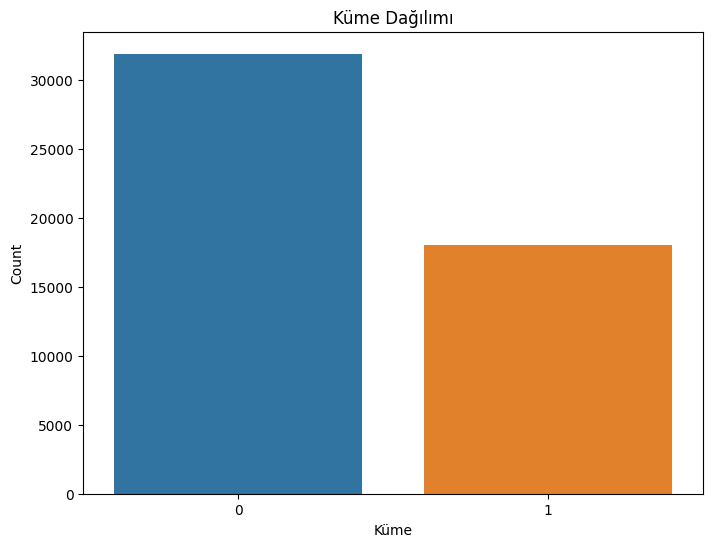

In [27]:
from sklearn.metrics import silhouette_score

# KMeans modelini oluşturma ve eğitme
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X)

# Küme etiketlerini alma
labels = kmeans.labels_

# Silhouette Skoru
silhouette_avg = silhouette_score(X, labels)

print("KMeans Silhouette Score:")
print(silhouette_avg)

# Küme dağılımını görselleştirme
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='cluster')
plt.title('Küme Dağılımı')
plt.xlabel('Küme')
plt.ylabel('Count')
plt.show()


***Karşılaştırma Sonucu***

**1. Lojistik Regresyon Accuracy Score: 0.8941**

Lojistik Regresyon modelinin doğruluk skoru %89.41 olarak hesaplanmış. Bu, modelin test setindeki örneklerin yaklaşık %89.41'ini doğru sınıflandırdığını gösterir. Bu oldukça yüksek bir doğruluk oranı ve modelin genel olarak iyi performans gösterdiğini işaret eder.

**2. KMeans Silhouette Score: 0.0045**

KMeans modelinin Silhouette skoru 0.0045 olarak hesaplanmış. Silhouette skoru, kümelerin iç içe geçme derecesini ve ne kadar ayrıştığını gösterir. 0'a yakın düşük bir skor, kümelerin birbirine oldukça yakın olduğunu ve kümeleme işleminin veriyi iyi ayrıştırmadığını gösterir. Bu durumda, KMeans ile elde edilen kümeler veri içinde çok belirgin değil ve verinin içindeki doğal yapıları iyi yansıtmayabilir.

**Skorlar Sonucunda Lojistik Regresyon ile ilerleme kararı aldık**

***Lojistik Regresyon için RandomizedSearchCV Kullanımı:***

In [28]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Lojistik Regresyon için hiperparametre aralıkları
param_dist = {
    'C': uniform(loc=0.01, scale=10),  # C parametresi için uniform dağılım
    'penalty': ['l1', 'l2'],            # Cezalandırma türleri
    'solver': ['liblinear', 'saga']     # Çözücüler
}

# Lojistik regresyon modelini oluşturma
logistic_model = LogisticRegression(max_iter=1000)

# RandomizedSearchCV ile hiperparametre optimizasyonu
random_search = RandomizedSearchCV(logistic_model, param_distributions=param_dist, 
                                   n_iter=10, cv=5, verbose=2, n_jobs=-1, random_state=42)

# Eğitim verileri üzerinde fit etme
random_search.fit(X_train, y_train)

# En iyi hiperparametreleri ve sonuçları yazdırma
print("En iyi hiperparametreler:")
print(random_search.best_params_)

print("\nEn iyi sonuç:")
print("Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
En iyi hiperparametreler:
{'C': 6.021150117432088, 'penalty': 'l2', 'solver': 'liblinear'}

En iyi sonuç:
Accuracy: 0.895575


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# En iyi model ile tahmin yapma
best_model = random_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Performans metriklerini hesaplama
print("En İyi Model Karışıklık Matrisi:")
print(confusion_matrix(y_test, y_pred_best))

print("\nEn İyi Model Sınıflandırma Raporu:")
print(classification_report(y_test, y_pred_best))

print("\nEn İyi Model Doğruluk Skoru:")
print(accuracy_score(y_test, y_pred_best))


En İyi Model Karışıklık Matrisi:
[[4394  567]
 [ 465 4574]]

En İyi Model Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      4961
           1       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000


En İyi Model Doğruluk Skoru:
0.8968


Karışıklık Matrisi:
[[4353  608]
 [ 451 4588]]

Doğruluk (Accuracy): 0.89
Kesinlik (Precision): 0.89
Duyarlılık (Recall): 0.89
F1 Puanı (F1 Score): 0.89


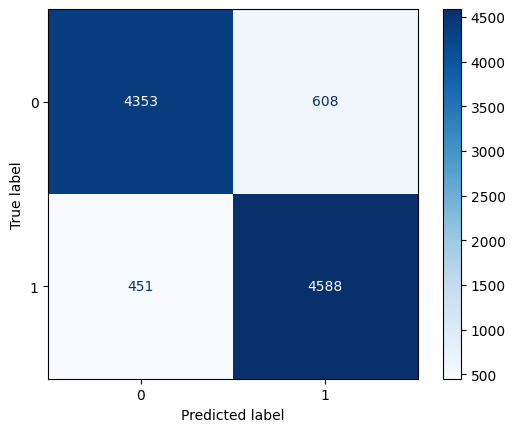

In [31]:
 from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# Modeli tanımlayın ve eğitin
logistic_regression = LogisticRegression(max_iter=1000)  

# Verinizin eğitim ve test setlerine bölündüğünden emin olun
# Örneğin:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logistic_regression.fit(X_train, y_train)

# Tahminlerinizi yapın
y_pred = logistic_regression.predict(X_test)

# Karışıklık matrisini oluşturun
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logistic_regression.classes_)

# Performans metriklerini hesaplayın
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Sonuçları yazdırın
print("Karışıklık Matrisi:")
print(cm)
print("\nDoğruluk (Accuracy): {:.2f}".format(accuracy))
print("Kesinlik (Precision): {:.2f}".format(precision))
print("Duyarlılık (Recall): {:.2f}".format(recall))
print("F1 Puanı (F1 Score): {:.2f}".format(f1))

# Karışıklık matrisini görselleştirin
disp.plot(cmap='Blues')

Bu bölümde ise modelimizin performansını değerleri eşliğinde değerlendirmiş olduk.